In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [2]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [3]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
alpha = torch.tensor(0.001)

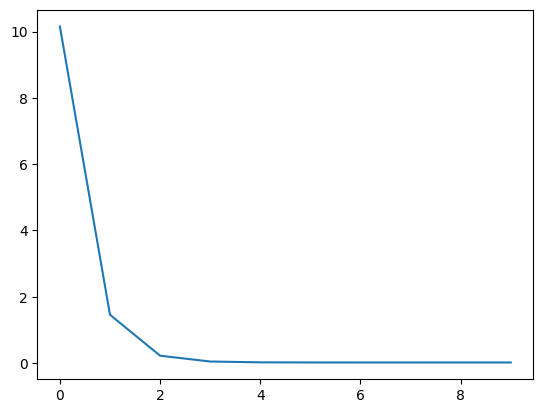

In [4]:
loss_list = []

for i in range(10):

    pred = w*x + b
    err = pred - y

    loss = torch.sum(err**2)/len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
       w -= alpha*w.grad
       b -= alpha*b.grad

    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)
plt.show()

# Q2

In [5]:
X = torch.tensor([2,4])
y = torch.tensor([20,40])

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
alpha = torch.tensor(0.001)

for i in range(2):
    
    pred = w * X + b
    error = pred - y

    loss = torch.sum(error ** 2) / (2 * len(X))

    loss.backward()

    print(f"Computed Gradients: w.grad={w.grad}, b.grad={b.grad}")
    print(f"Analytical Gradients: w.grad={torch.sum(error*X) / len(X)}, b.grad={torch.sum(error) / len(X)}")

    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    w.grad.zero_() 
    b.grad.zero_()

Computed Gradients: w.grad=-87.0, b.grad=-26.0
Analytical Gradients: w.grad=-87.0, b.grad=-26.0
Computed Gradients: w.grad=-86.052001953125, b.grad=-25.71299934387207
Analytical Gradients: w.grad=-86.052001953125, b.grad=-25.71299934387207


# Q3

In [6]:
class CustomLinearRegression:

    def __init__(self, learning_rate=0.001):

        self.w = torch.randn([1]).requires_grad_(True)
        self.b = torch.randn([1]).requires_grad_(True)
        self.lr = learning_rate

    def forward(self, X):
        return self.w * X + self.b

    def update(self):
        with torch.no_grad():
            self.w -= self.lr * self.w.grad
            self.b -= self.lr * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, preds, labels):
        return torch.sum((preds - labels) ** 2) / len(labels)

    def fit(self, X, y, epochs=100):

        losses = []

        for epoch in range(epochs):

            preds = self.forward(X)
            loss = self.criterion(preds, y)
            losses.append(loss.item())

            loss.backward()

            self.update()
            self.reset_grad()

        print(f"Final params are: w={self.w}, b={self.b}, loss={losses[-1]}")
        return self.w.item(), self.b.item()

Final params are: w=tensor([12.8762], requires_grad=True), b=tensor([1.7802], requires_grad=True), loss=482.55029296875


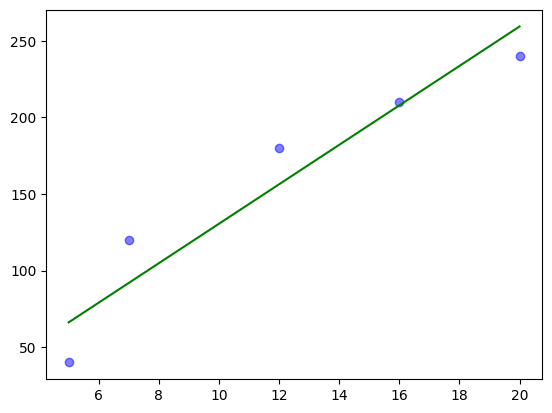

In [7]:
X = torch.Tensor([5, 7, 12, 16, 20])
y = torch.Tensor([40, 120, 180, 210, 240])

m = CustomLinearRegression()
w, b = m.fit(X, y)
pred = w * X + b

plt.plot(X, y, "bo", alpha=0.5)
plt.plot(X, pred.detach().numpy(), "g-")
plt.show()

## Data for Q4 and Q5

In [8]:
X = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

# Q4

In [9]:
class LinearRegression(nn.Module):

    def __init__(self, learning_rate=0.001):
        super(LinearRegression, self).__init__()

        self.w = torch.randn([1]).requires_grad_(True)
        self.b = torch.randn([1]).requires_grad_(True)
        
        self.optimizer = torch.optim.SGD([self.w, self.b], lr=learning_rate)
        self.criterion = nn.MSELoss()


    def forward(self, X):
        return self.w * X + self.b

    def fit(self, X, y, num_epochs=1000):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        print(f"Final params are: w={self.w}, b={self.b}, loss={losses[-1]}")
        
        final_preds = (self.w * X + self.b).detach().numpy()
        plt.plot(X, y, "bo", alpha=0.5)
        plt.plot(X, final_preds, "g-")
        plt.show()


Final params are: w=tensor([0.7683], requires_grad=True), b=tensor([1.9078], requires_grad=True), loss=0.05076098442077637


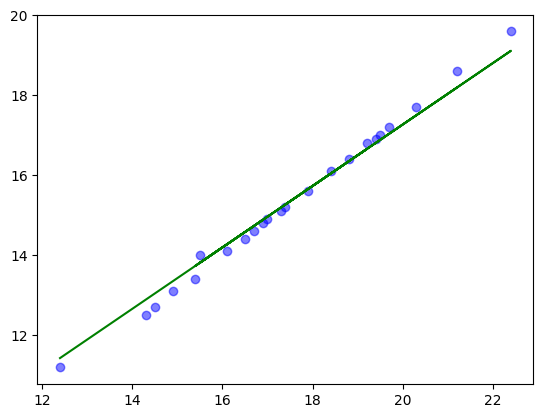

In [10]:
m = LinearRegression()
m.fit(X, y)

# Q5

In [11]:
class TrueLinearRegression(nn.Module):

    def __init__(self, input_dims, learning_rate=0.001):

        super(TrueLinearRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

    def forward(self, X):
        return self.linear(X)

    def fit(self, X, y, num_epochs=100, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            final_preds = self(X).detach().numpy()
            plt.plot(X, y, "bo", alpha=0.5)
            plt.plot(X, final_preds, "g-")
            plt.show()

linear.weight = tensor([[0.8393]])
linear.bias = tensor([0.6443])


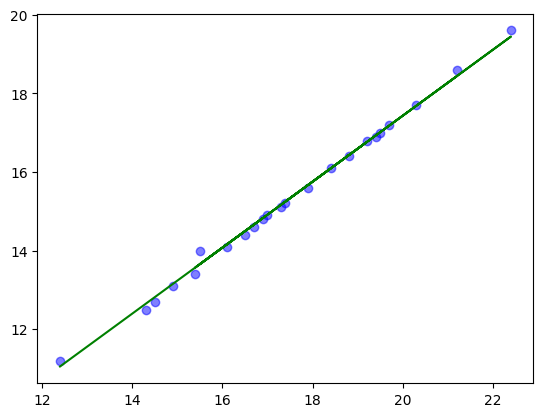

In [12]:
m = TrueLinearRegression(input_dims=1)
m.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Q6 - Multi LR

In [13]:
X = torch.Tensor([[3, 8], [4, 5], [5, 7], [6, 3], [2, 1]])
y = torch.Tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).reshape(-1, 1)

In [14]:
m = TrueLinearRegression(input_dims=2)
m.fit(X, y, plot=False)

linear.weight = tensor([[ 1.4220, -0.4938]])
linear.bias = tensor([-0.2261])


# Q7 - LogiReg

In [15]:
class LogisticRegression(nn.Module):

    def __init__(self, input_dims=1, learning_rate=0.005):

        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)
        self.sigmoid = nn.Sigmoid()

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.BCELoss()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

    def fit(self, X, y, num_epochs=5000, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            plt.plot(range(num_epochs), losses, "g-")
            plt.show()

linear.weight = tensor([[0.0940]])
linear.bias = tensor([-3.0120])


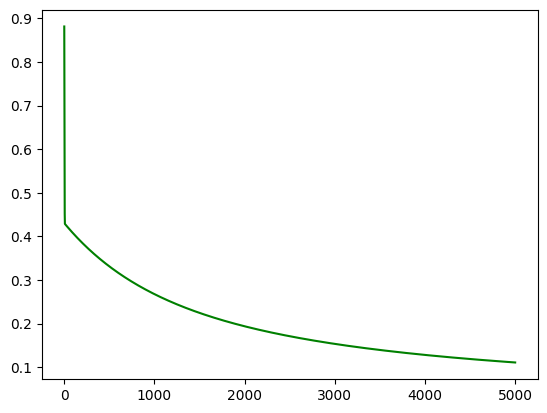

In [17]:
X = torch.Tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).reshape(-1, 1)
y = torch.Tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

m = LogisticRegression()
m.fit(X, y)

32.03415298461914


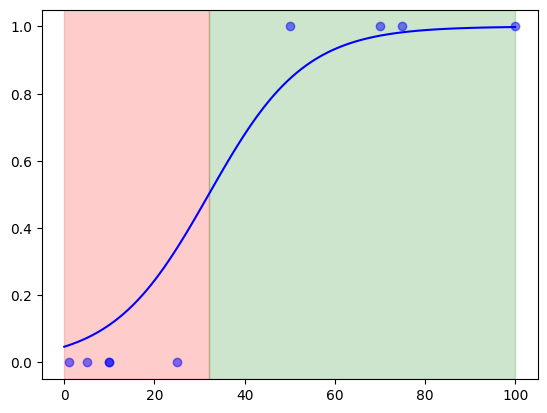

In [18]:
plt.plot(X, y, "bo", alpha=0.5)

params = [x.data for x in list(m.parameters())]
mid_pt = float(- params[1] / params[0])

print(mid_pt)

plt.axvspan(0, mid_pt, alpha=0.2, color='r')
plt.axvspan(mid_pt, 100, alpha=0.2, color='g')

test_X = torch.linspace(0, 100, steps=100).reshape(-1, 1)
plt.plot(test_X, m(test_X).detach().numpy(), "b")

plt.show()